 <h2><center>Importing All Libraries</center></h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

<h2><center>Reading Dataset</center></h2>

In [2]:
dataset = pd.read_csv('heart1.csv')
p= dataset.iloc[:,0:11].values
y= dataset.iloc[:, 11].values

In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1831,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
1832,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
1833,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
1834,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
print("\n                                   Information of Data                     ")
dataset.info()


                                   Information of Data                     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1836 non-null   int64  
 1   Sex             1836 non-null   object 
 2   ChestPainType   1836 non-null   object 
 3   RestingBP       1836 non-null   int64  
 4   Cholesterol     1836 non-null   int64  
 5   FastingBS       1836 non-null   int64  
 6   RestingECG      1836 non-null   object 
 7   MaxHR           1836 non-null   int64  
 8   ExerciseAngina  1836 non-null   object 
 9   Oldpeak         1836 non-null   float64
 10  ST_Slope        1836 non-null   object 
 11  HeartDisease    1836 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 172.2+ KB


<h2><center>Representation of heartDisease according to male and female</center></h2>

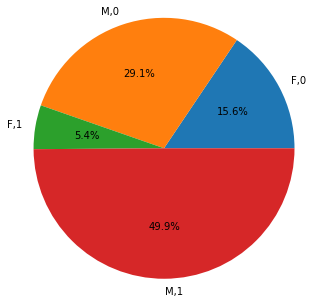

In [5]:
#pie chart
data_graph_sex = dataset.groupby(["HeartDisease","Sex"]).size()
plt.pie(data_graph_sex.values, labels = ["F,0","M,0","F,1","M,1"], autopct='%1.1f%%',
        radius = 1.5, textprops = {"fontsize" : 10}) 
plt.show()

<h2> Pair Plotting </h2>

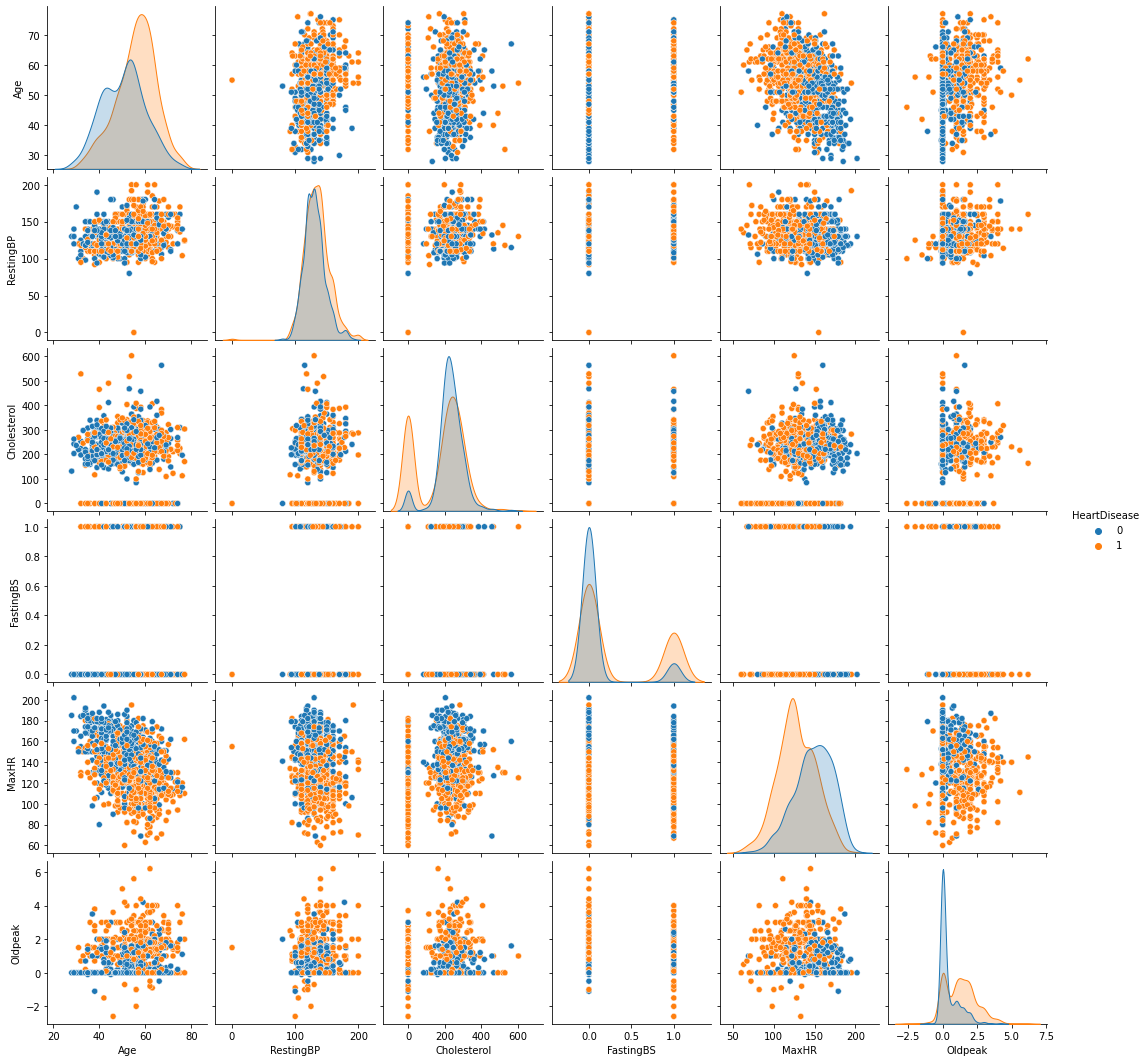

In [6]:
import seaborn as sns
sns.pairplot(dataset,hue="HeartDisease")

<h2><center>Label Encoding</center></h2>

In [7]:
labelencoder = LabelEncoder()
p[:, 1] = labelencoder.fit_transform(p[:, 1])
p[:, 2] = labelencoder.fit_transform(p[:, 2])
p[:, 6] = labelencoder.fit_transform(p[:, 6])
p[:, 8] = labelencoder.fit_transform(p[:, 8])
p[:, 10] = labelencoder.fit_transform(p[:, 10])
print("##########After Label Encoding###########")
print(p)

##########After Label Encoding###########
[[40 1 1 ... 0 0.0 2]
 [49 0 2 ... 0 1.0 1]
 [37 1 1 ... 0 0.0 2]
 ...
 [57 1 0 ... 1 1.2 1]
 [57 0 1 ... 0 0.0 1]
 [38 1 2 ... 0 0.0 2]]


<h2><center>Selection of important feature</center></h2>


##########Importance of each feature###########


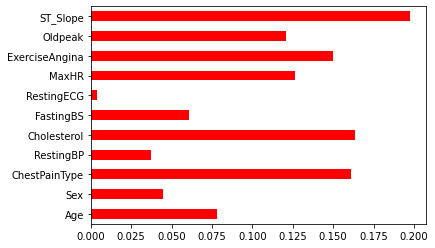

In [31]:
from sklearn.feature_selection import mutual_info_classif
print("\n##########Importance of each feature###########")
importances =mutual_info_classif(p,y)
feat_importances = pd.Series(importances,dataset.columns[0:len(dataset.columns)-1])
feat_importances.plot(kind='barh',color='red')
plt.show()

<h4><center>Representation of possibility of having heart disease</center></h4>

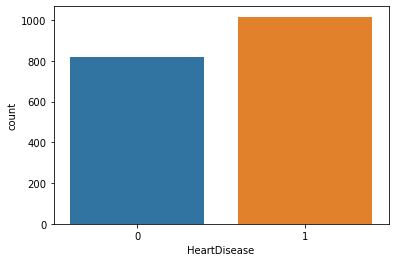

In [9]:
sns.countplot(x="HeartDisease", data=dataset)
plt.show()
#sns.catplot('Chest_Pain_Type',data=dataset,hue = 'Chest_Pain', kind="count")


<h4><center>Frequency of male and female</center></h4>

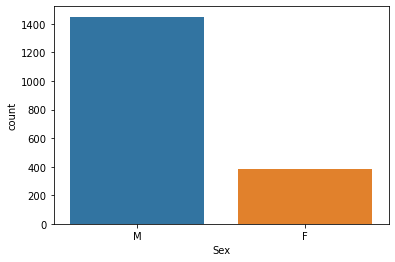

In [10]:
sns.countplot(x="Sex", data=dataset)
plt.show()

<h4><center>Resting BP</center></h4>

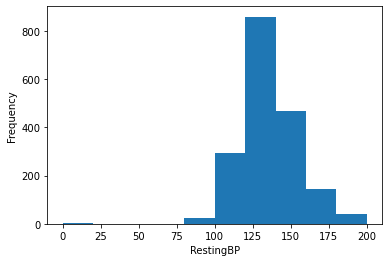

In [11]:
dataset["RestingBP"].plot.hist()
plt.xlabel('RestingBP')
plt.show()

<h4><center>Cholesterol</center></h4>

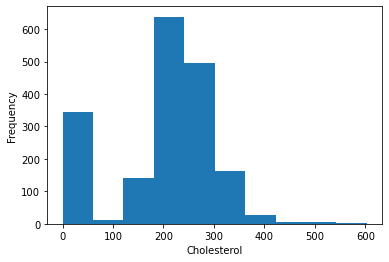

In [12]:
dataset["Cholesterol"].plot.hist()
plt.xlabel('Cholesterol')
plt.show()

<h4><center>FastingBS</center></h4>

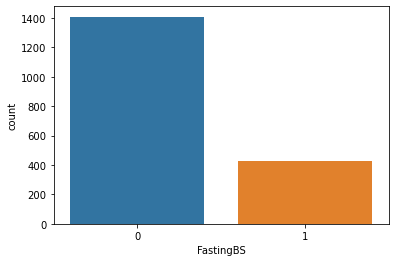

In [13]:
sns.countplot(x="FastingBS", data=dataset)
plt.show()

<h4><center>ST_Slope</center></h4>

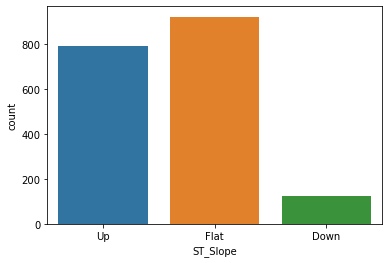

In [14]:
sns.countplot(x="ST_Slope", data=dataset)
plt.show()

<h2><center>Scaling of Data</center></h2>

In [15]:
X = p[:,0:11]
y= dataset.iloc[:, 11].values
 # Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                        test_size = 0.25, random_state = 42) 
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2><center>Support Vector Machine Classification Algorithm </center> </h2>

In [16]:
#######Linear SVM Classification:

# Fitting SVM to the Training set
from sklearn.svm import SVC
#classifier = SVC(kernel = 'linear', random_state = 0)
####RBF SVM Classification:
classifier = SVC(kernel = 'rbf', random_state = 0)
###### POLYNOMIAL########
#classifier = SVC(kernel = 'poly', random_state = 0,degree = 4)
######SIGMOID ############################
#classifier = SVC(kernel = 'sigmoid', random_state = 42)

classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy using SVM: ",accuracy_score(y_test, y_pred))


Accuracy using SVM:  0.8823529411764706


<h2><center>Confusion Matrix</center> </h2>

My Confusion Matrix SVM : [[156  33]
 [ 21 249]]


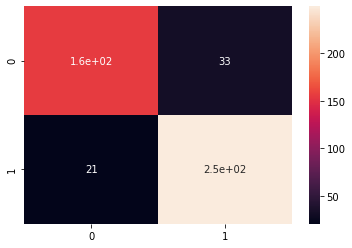

In [17]:
from sklearn.metrics import confusion_matrix
print("My Confusion Matrix SVM :",confusion_matrix(y_test, y_pred))
cf_mat=confusion_matrix(y_test, y_pred)
sns.heatmap(cf_mat,annot=True)
m_accuracy=[]
m_accuracy.append(accuracy_score(y_test, y_pred))


 <h2><center>AUC & ROC Curve </center></h2> 

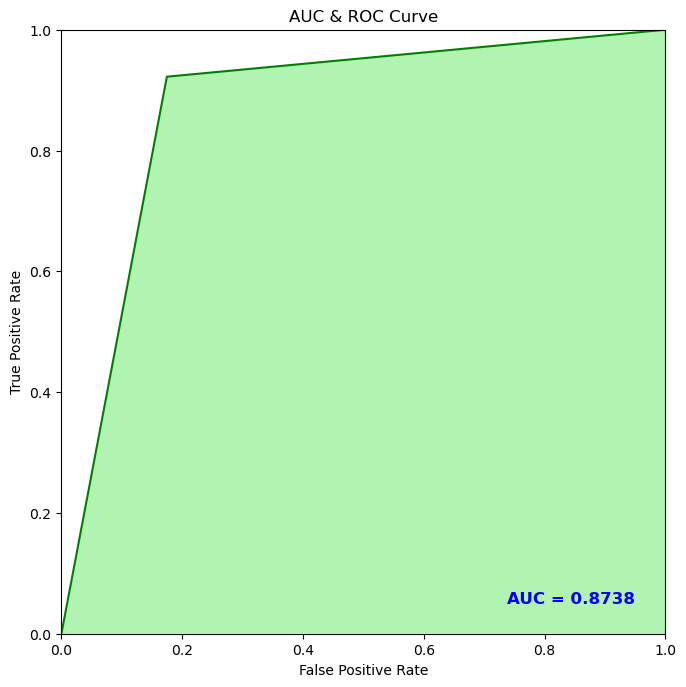

In [18]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

<h2><center>K-Nearest Neighbors Classification Algorithm</center></h2>

In [19]:
#knn
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(weights='distance')
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy using KNN: ",accuracy_score(y_test, y_pred))

m_accuracy.append(accuracy_score(y_test, y_pred))
#new patient heart failure cholestrol =180,STslope=1
k=classifier.predict(sc.transform([[49,0,2,160,180,0,1,156,0,1.0,1]]))
print("New patient:",k)
if k[0]==0:
    print("no heart fail")
else:
    print("heart fail")

Accuracy using KNN:  0.9694989106753813
New patient: [1]
heart fail


<h2><center>Confusion Matrix </center></h2>

My Confusion Matrix  KNN: [[185   4]
 [ 10 260]]


<AxesSubplot:>

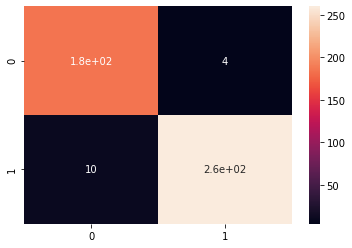

In [20]:
from sklearn.metrics import confusion_matrix
print("My Confusion Matrix  KNN:",confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

<h2><center>Random Forest Classification Algorithm(Using Gini)</center></h2>

In [21]:
#RF
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:" , accuracy_score(y_test, y_pred))
m_accuracy.append(accuracy_score(y_test, y_pred))
#new prediction cholesterol=264 ST slope=1
k=classifier.predict(sc.transform([[45,0,1,130,237,0,1,170,0,0.0,2]]))
print("New patient:",k)
if k[0] == 0:
    print("Not heart disease")
else:
    print("Heart disease")

    
rf_accuracy=[]
rf_accuracy.append(accuracy_score(y_test, y_pred))

Accuracy: 0.9738562091503268
New patient: [0]
Not heart disease


<h2><center>Random Forest Classification Algorithm(Using Entropy)</center></h2>

In [22]:
#RF
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:" , accuracy_score(y_test, y_pred))
#new prediction cholesterol=264 ST slope=1
k=classifier.predict(sc.transform([[45,0,1,130,237,0,1,170,0,0.0,2]]))
print("New patient:",k)
if k[0] == 0:
    print("Not heart disease")
else:
    print("Heart disease")
rf_accuracy.append(accuracy_score(y_test, y_pred))

Accuracy: 0.9782135076252724
New patient: [0]
Not heart disease


<h2><center>Decision Tree Classification Algorithm(Using Gini)</center></h2>

In [23]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy using decision tree:",accuracy_score(y_test, y_pred))
m_accuracy.append(accuracy_score(y_test, y_pred))

d_accuracy=[]
d_accuracy.append(accuracy_score(y_test, y_pred))

Accuracy using decision tree: 0.9564270152505446


<h2><center>Decision Tree Classification Algorithm(Using Entropy)</center></h2>

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',
                                    random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy using decision tree:",accuracy_score(y_test, y_pred))
d_accuracy.append(accuracy_score(y_test, y_pred))

Accuracy using decision tree: 0.9694989106753813


<h2><center>Naive-Bayes Classification Algorithm</center></h2>

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
print("Acuuracy:",accuracy_score(y_test, y_pred))
m_accuracy.append(accuracy_score(y_test, y_pred))
#heart failure
k=classifier.predict(sc.transform([[45,0,1,130,237,0,1,170,0,0.0,2]]))
print("patient:",k)


Acuuracy: 0.8605664488017429
patient: [0]


<h2><center>Confusion Matrix </center></h2>

My Confusion Matrix: [[157  32]
 [ 32 238]]


<AxesSubplot:>

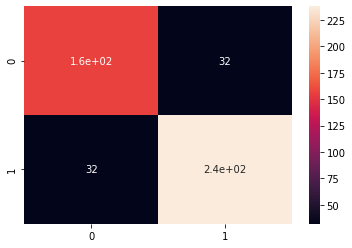

In [26]:
print("My Confusion Matrix:",confusion_matrix(y_test, y_pred))
cf_mat=confusion_matrix(y_test, y_pred)
sns.heatmap(cf_mat,annot=True)

<h2><center>Accuracy comparison</center></h2>

SVM    0.882353
knn    0.969499
rf     0.973856
dt     0.956427
nb     0.860566
dtype: float64


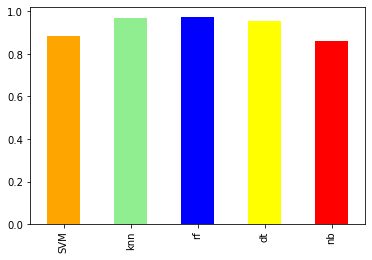

In [27]:
s=pd.Series(m_accuracy,index=['SVM','knn','rf','dt','nb'])
print(s)
s.plot(kind='bar',color=['orange', 'lightgreen', 'blue', 'yellow', 'red'])
plt.show()

<h2><center>Decision Tree Comparision of Gini Impurity and Entropy purity</center></h2>

gini       0.956427
entropy    0.969499
dtype: float64


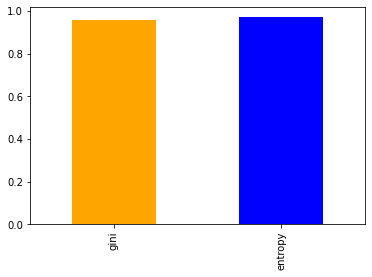

In [28]:
decision=pd.Series(d_accuracy,index=['gini','entropy'])
print(decision)
decision.plot(kind='bar',color=['orange','blue'])
plt.show()

<h2><center>Random Forest Comparision of Gini Impurity and Entropy purity</center></h2>

gini       0.973856
entropy    0.978214
dtype: float64


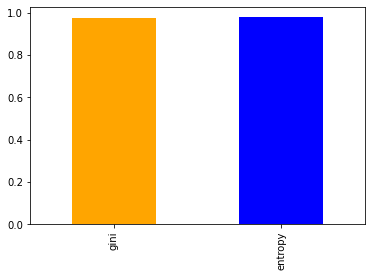

In [29]:
randomf=pd.Series(rf_accuracy,index=['gini','entropy'])
print(randomf)
randomf.plot(kind='bar',color=['orange','blue'])
plt.show()